Media a posteriori a lui λ: 18.0410
Modul a posteriori al lui λ: 17.9884
Intervalul HDI de 94% pentru λ: [16.3068, 19.8502]



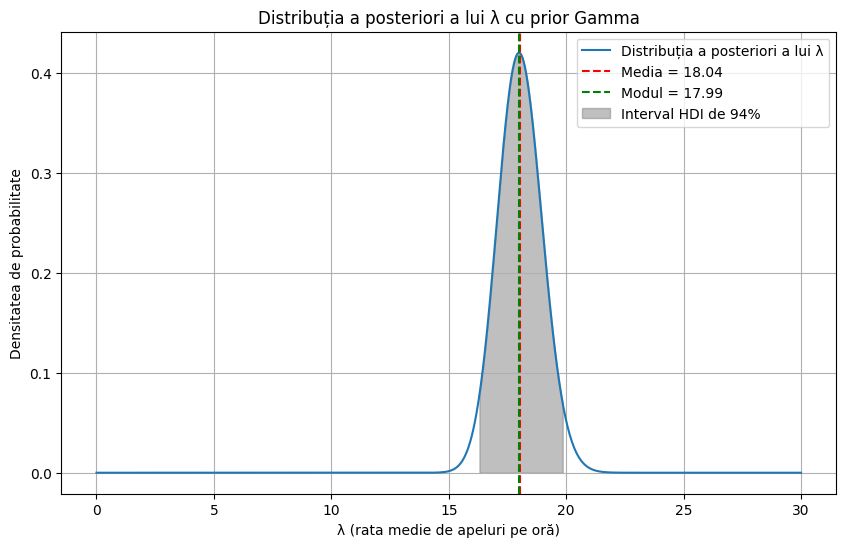

In [15]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Datele de intrare
k = 180    # Numărul total de apeluri observate
T = 10     # Intervalul de timp în ore

# Parametrii distribuției prior Gamma
alpha_prior = 1
beta_prior = 0.01

alpha_posterior = alpha_prior + k
beta_posterior = beta_prior + T

# Definim gama de valori pentru λ (rata medie de apeluri pe oră)
lambda_values = np.linspace(0.001, 30, 1000)  # Evităm zero pentru stabilitate numerică

# Funcția densitate a priori (cu Gamma)
prior_pdf = stats.gamma.pdf(lambda_values, a=alpha_posterior, scale=1/beta_posterior)

# Funcția de verosimilitate Poisson
likelihood = stats.poisson.pmf(k, mu=T * lambda_values)

# Calculăm distribuția a posteriori ne-normalizată
unnormalized_posterior = likelihood * prior_pdf

# Normalizăm distribuția a posteriori
posterior_pdf = unnormalized_posterior / np.trapz(unnormalized_posterior, lambda_values)

# Calculăm media a posteriori a lui λ
mean_lambda = np.trapz(lambda_values * posterior_pdf, lambda_values)

# Calculăm modulul a posteriori al lui λ (valoarea λ unde posteriorul atinge maximul)
mode_index = np.argmax(posterior_pdf)
mode_lambda = lambda_values[mode_index]

# Calculăm intervalul HDI de 94%
cumulative = np.cumsum(posterior_pdf) * (lambda_values[1] - lambda_values[0])
lower_idx = np.where(cumulative >= 0.03)[0][0]
upper_idx = np.where(cumulative <= 0.97)[0][-1]
lower_bound = lambda_values[lower_idx]
upper_bound = lambda_values[upper_idx]

print(f"Media a posteriori a lui λ: {mean_lambda:.4f}")
print(f"Modul a posteriori al lui λ: {mode_lambda:.4f}")
print(f"Intervalul HDI de 94% pentru λ: [{lower_bound:.4f}, {upper_bound:.4f}]\n")

# Vizualizarea distribuției a posteriori
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, posterior_pdf, label='Distribuția a posteriori a lui λ')
plt.axvline(mean_lambda, color='r', linestyle='--', label=f'Media = {mean_lambda:.2f}')
plt.axvline(mode_lambda, color='g', linestyle='--', label=f'Modul = {mode_lambda:.2f}')
plt.fill_between(lambda_values, posterior_pdf, where=(lambda_values >= lower_bound) & (lambda_values <= upper_bound), color='gray', alpha=0.5, label='Interval HDI de 94%')
plt.title('Distribuția a posteriori a lui λ cu prior Gamma')
plt.xlabel('λ (rata medie de apeluri pe oră)')
plt.ylabel('Densitatea de probabilitate')
plt.legend()
plt.grid(True)
plt.show()

Media a posteriori a lui λ: 17.8869
Modul a posteriori al lui λ: 17.8082
Intervalul HDI de 94% pentru λ: [15.5560, 20.3307]



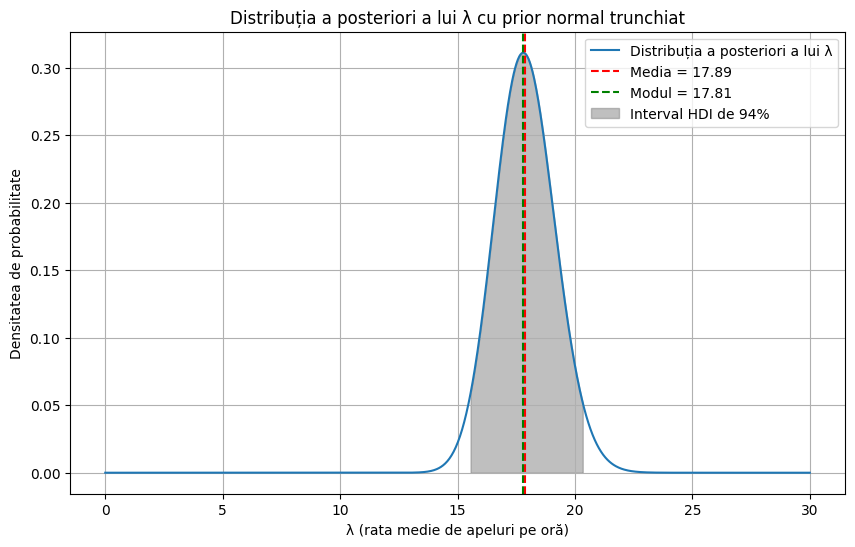

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Datele de intrare
k = 180    # Numărul total de apeluri observate
T = 10     # Intervalul de timp în ore

# Parametrii distribuției prior normală trunchiată la zero
mu_prior = 15      # Presupunem că rata medie a priori este 15 apeluri/oră
sigma_prior = 5    # Presupunem o deviație standard de 5 apeluri/oră

# Un prior prost ales duce la rezultate eronate
# mu_prior = 0      # Presupunem că rata medie a priori este 0 apeluri/oră
# sigma_prior = 1    # Presupunem o deviație standard de 1 apel/oră

# Definim gama de valori pentru λ (rata medie de apeluri pe oră)
lambda_values = np.linspace(0.001, 30, 1000)  # Evităm zero pentru stabilitate numerică

# Funcția densitate a priori (normală trunchiată la zero)
prior_pdf = stats.truncnorm.pdf(
    lambda_values,
    a=(0 - mu_prior) / sigma_prior,
    b=np.inf,
    loc=mu_prior,
    scale=sigma_prior
)

# Funcția de verosimilitate Poisson
likelihood = stats.poisson.pmf(k, mu=T * lambda_values)

# Calculăm distribuția a posteriori ne-normalizată
unnormalized_posterior = likelihood * prior_pdf

# Normalizăm distribuția a posteriori
posterior_pdf = unnormalized_posterior / np.trapz(unnormalized_posterior, lambda_values)

# Calculăm media a posteriori a lui λ
mean_lambda = np.trapz(lambda_values * posterior_pdf, lambda_values)

# Calculăm modulul a posteriori al lui λ (valoarea λ unde posteriorul atinge maximul)
mode_index = np.argmax(posterior_pdf)
mode_lambda = lambda_values[mode_index]

# Calculăm intervalul HDI de 94%
cumulative = np.cumsum(posterior_pdf) * (lambda_values[1] - lambda_values[0])
lower_idx = np.where(cumulative >= 0.03)[0][0]
upper_idx = np.where(cumulative <= 0.97)[0][-1]
lower_bound = lambda_values[lower_idx]
upper_bound = lambda_values[upper_idx]

print(f"Media a posteriori a lui λ: {mean_lambda:.4f}")
print(f"Modul a posteriori al lui λ: {mode_lambda:.4f}")
print(f"Intervalul HDI de 94% pentru λ: [{lower_bound:.4f}, {upper_bound:.4f}]\n")

# Vizualizarea distribuției a posteriori
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, posterior_pdf, label='Distribuția a posteriori a lui λ')
plt.axvline(mean_lambda, color='r', linestyle='--', label=f'Media = {mean_lambda:.2f}')
plt.axvline(mode_lambda, color='g', linestyle='--', label=f'Modul = {mode_lambda:.2f}')
plt.fill_between(lambda_values, posterior_pdf, where=(lambda_values >= lower_bound) & (lambda_values <= upper_bound), color='gray', alpha=0.5, label='Interval HDI de 94%')
plt.title('Distribuția a posteriori a lui λ cu prior normal trunchiat')
plt.xlabel('λ (rata medie de apeluri pe oră)')
plt.ylabel('Densitatea de probabilitate')
plt.legend()
plt.grid(True)
plt.show()